# **Implement SVM (use linear, polynomial and rbf kernel)**
### **Name: Tarun**

### **Date: 09/November/2021**



*   If we have a big data set that needs a complicated model, then we can use Support Vector
machine.
*   It prevents overfitting while using big sets of features.
*   SVM are supervised learning models with associated learning algorithms that analyze data and
recognize patterns used for classification and regression analysis.
*   It is a Non Probabilistic binary linear classifier However, it supports non linear classification
using the kernel trick





# **SVM Using Linear Kernal**


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/ML_Lab/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking how may unique species are there..
df.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
col = ['PetalLengthCm', 'PetalWidthCm']
X = df.loc[:, col]
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['tmp'] = df['Species'].map(species_to_num)
y = df['tmp']
clf = svm.SVC(kernel='linear', C=0.001)
clf.fit(X, y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

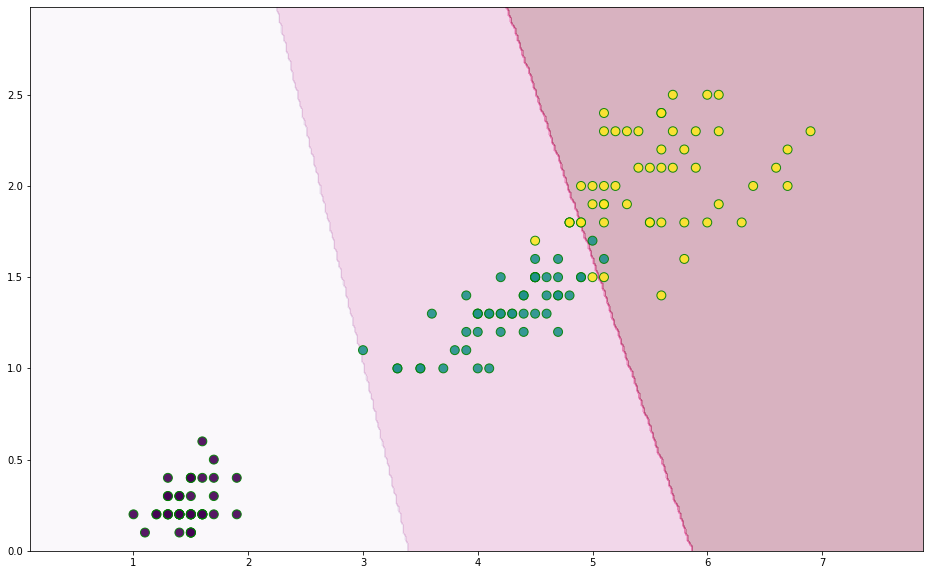

In [ ]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'PuRd', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
clf = svm.SVC(kernel = 'linear', C=1)
clf.fit(X_std_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print("Average Accuracy Linear: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD Linear: \t\t {0:.4f}".format(np.std(res)))


Average Accuracy Linear: 	 0.9500
Accuracy SD Linear: 		 0.0553


In [ ]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)


array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [ ]:
print("Precision Score Linear: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average='weighted'))) 
print("Recall Score Linear: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("F1 Score Linear: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average='weighted')))

Precision Score Linear: 	 0.9500
Recall Score Linear: 		 0.9500
F1 Score Linear: 		 0.9500


# **SVM Using polynomial Kernal**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/ML_Lab/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking how may unique species are there..
df.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
col = ['PetalLengthCm', 'PetalWidthCm']
X = df.loc[:, col]
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['tmp'] = df['Species'].map(species_to_num)
y = df['tmp']
clf = svm.SVC(kernel='poly', C=0.001)
clf.fit(X, y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

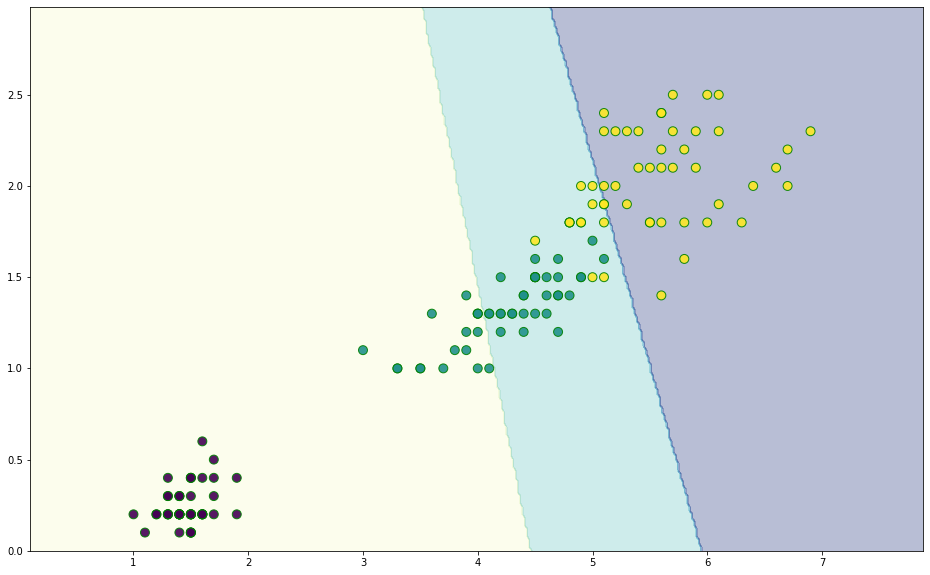

In [ ]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
clf = svm.SVC(kernel = 'poly', C=1)
clf.fit(X_std_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print("Average Accuracy Polynomial: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD Polynomial: \t\t {0:.4f}".format(np.std(res)))


Average Accuracy Polynomial: 	 0.9500
Accuracy SD Polynomial: 		 0.0764


In [ ]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)


array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]])

In [ ]:
print("Precision Score Linear: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average='weighted'))) 
print("Recall Score Linear: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("F1 Score Linear: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average='weighted')))

Precision Score Linear: 	 0.9570
Recall Score Linear: 		 0.9500
F1 Score Linear: 		 0.9500


# **SVM Using RBF(Radial Basis Function) Kernal**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/ML_Lab/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking how may unique species are there..
df.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
col = ['PetalLengthCm', 'PetalWidthCm']
X = df.loc[:, col]
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['tmp'] = df['Species'].map(species_to_num)
y = df['tmp']
clf = svm.SVC(kernel='rbf', C=0.001)
clf.fit(X, y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

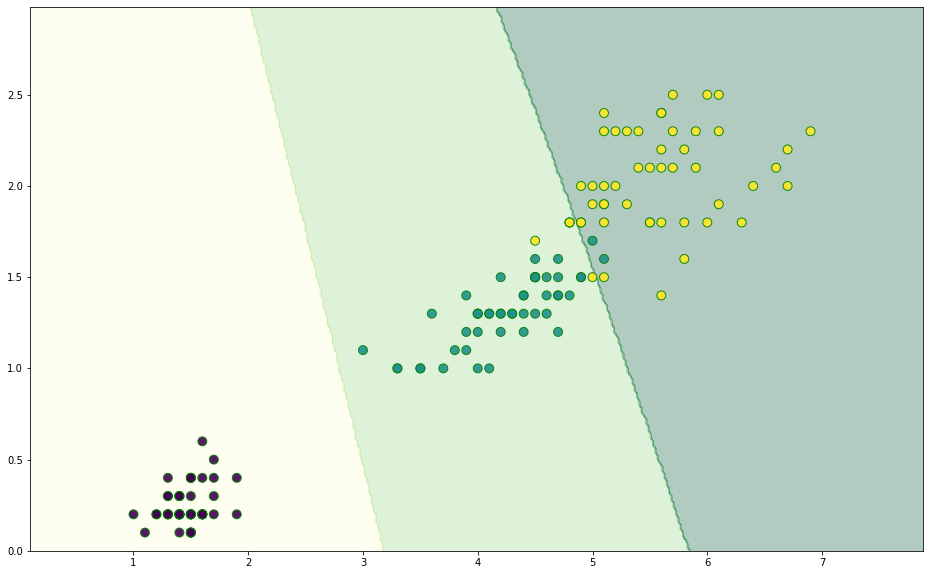

In [ ]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGn', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
clf = svm.SVC(kernel = 'rbf', C=1)
clf.fit(X_std_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring = 'accuracy')
print("Average Accuracy RBF: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD RBF: \t\t {0:.4f}".format(np.std(res)))


Average Accuracy RBF: 	 0.9500
Accuracy SD RBF: 		 0.0553


In [ ]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)


array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [ ]:
print("Precision Score Linear: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average='weighted'))) 
print("Recall Score Linear: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("F1 Score Linear: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average='weighted')))

Precision Score Linear: 	 0.9500
Recall Score Linear: 		 0.9500
F1 Score Linear: 		 0.9500
